# Predict Survival of Patients with Heart Failure from the Patient's Medical Records

### Introduction:
Cardiovascular diseases (CVD) cause approximately 17 million deaths around the world every year. Heart failure is a common type of CVD, and it occurs when the heart is unable to pump sufficient blood to meet the body’s needs. In this analysis we are using machine learning to investigate a crucial predictive question. What are the chances of survival for a patient with heart failure and what are the medical factors that predict such an outcome? The data set that will be used to answer this question contains the medical records (EHRs) of 299 heart failure patients collected at the Faisalabad Institute of Cardiology and at the Allied Hospital in Faisalabad, in 2015. 

|Variables|Description|
|---------|-----------|
|Age (Integer)|Range from 40 – 95 years old|
|Anaemia (Boolean)|Lack of hemoglobin or red blood cells|
|High Blood Pressure (Boolean)|Force of blood against artery walls|
|Creatinine phosphokinase (mcg/L)|Amount of CPK enzyme in the blood|
|Diabetes (Boolean)|Lack of insulin|
|Ejection Fraction (%)|Blood pumped from the heart during a single contraction|
|Sex (Boolean)|Female or male|
|Platelets (kiloplatelets/mL)|Amount of platelets (cells which help blood clots)|
|Serum creatinine (mg/dL)|Level of creatinine in the blood|
|Serum sodium (mEq/L)|Level of sodium in the blood|
|Smoking (Boolean)|Whether patient smokes|
|Time (Integer)|Clinic follow-up in days|
|Death event (Boolean)|Died during follow-up period|

### Citation:

**UCI Data:**
Chicco, D. (2020, February 5). Heart failure clinical records Data Set. UCI Machine Learning Repository: Heart Failure Clinical Records Data Set. Retrieved March 2, 2022, from https://archive.ics.uci.edu/ml/datasets/Heart+failure+clinical+records# 

**Research using the data:**
Davide Chicco, Giuseppe Jurman: "Machine learning can predict survival of patients with heart failure from serum creatinine and ejection fraction alone". BMC Medical Informatics and Decision Making 20, 16 (2020).


# Preliminary exploratory data analysis:

In [1]:
# The packages we need to load are tidyverse, repr, tidymodels, ggplot2, and GGally. We have done so below.
library(tidyverse)
library(repr)
library(tidymodels)
options(repr.matrix.max.rows = 6)
library("ggplot2")
library("GGally")

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.2     ✔ purrr   0.3.4
✔ tibble  3.0.3     ✔ dplyr   1.0.2
✔ tidyr   1.1.2     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.5.0

Warning message:
“package ‘ggplot2’ was built under R version 4.0.1”
Warning message:
“package ‘tibble’ was built under R version 4.0.2”
Warning message:
“package ‘tidyr’ was built under R version 4.0.2”
Warning message:
“package ‘dplyr’ was built under R version 4.0.2”
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Warning message:
“package ‘tidymodels’ was built under R version 4.0.2”
── Attaching packages ────────────────────────────────────── tidymodels 0.1.1 ──

✔ broom     0.7.0      ✔ recipes   0.1.13
✔ dials     0.0.9      ✔ rsample   0.0.7 
✔ infer     0.5.4      ✔ tune      0.1.1 
✔ modeldata 0.0.2      ✔ workflows 0.2.0 
✔ parsnip   0.1.3    

In [2]:
# We have used the URL that contains the data and directly read it using the read_csv() function below. We have not stored the
# data locally. This makes our proposal reproducible. 

url <- "https://archive.ics.uci.edu/ml/machine-learning-databases/00519/heart_failure_clinical_records_dataset.csv"
heart_failure <- read_csv(url)
heart_failure

Parsed with column specification:
cols(
  age = col_double(),
  anaemia = col_double(),
  creatinine_phosphokinase = col_double(),
  diabetes = col_double(),
  ejection_fraction = col_double(),
  high_blood_pressure = col_double(),
  platelets = col_double(),
  serum_creatinine = col_double(),
  serum_sodium = col_double(),
  sex = col_double(),
  smoking = col_double(),
  time = col_double(),
  DEATH_EVENT = col_double()
)



age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
75,0,582,0,20,1,265000,1.9,130,1,0,4,1
55,0,7861,0,38,0,263358,1.1,136,1,0,6,1
65,0,146,0,20,0,162000,1.3,129,1,1,7,1
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
45,0,2060,1,60,0,742000,0.8,138,0,0,278,0
45,0,2413,0,38,0,140000,1.4,140,1,1,280,0
50,0,196,0,45,0,395000,1.6,136,1,1,285,0


In [3]:
# The boolean variables have been converted into factors using the as_factor() and then the values corresponding to 0 have been
# changed to "no" and values corresponding to 1 have been changed to "yes". 
# Changing the values as shown below make the data more comprehensible and easy to explain.

heart_failure <- heart_failure %>%
            mutate(anaemia = as_factor(anaemia),
                   diabetes = as_factor(diabetes),
                   sex = as_factor(sex),
                   high_blood_pressure = as_factor(high_blood_pressure),
                   smoking = as_factor(smoking),
                   DEATH_EVENT = as_factor(DEATH_EVENT))

# # ASK TA IF THERE IS A SHORTER WAY TO DO THE TASK BELOW

levels(heart_failure$anaemia) <- c("no", "yes")
levels(heart_failure$diabetes) <- c("no", "yes")
levels(heart_failure$sex) <- c("female", "male")
levels(heart_failure$high_blood_pressure) <- c("no", "yes")
levels(heart_failure$smoking) <- c("no", "yes")
levels(heart_failure$DEATH_EVENT) <- c("no", "yes")

# #levels(heart_failure$anaemia$diabetes$high_blood_pressure$smoking$DEATH_EVENT) <- c("no", "yes")


heart_failure

age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
<dbl>,<fct>,<dbl>,<fct>,<dbl>,<fct>,<dbl>,<dbl>,<dbl>,<fct>,<fct>,<dbl>,<fct>
75,no,582,no,20,yes,265000,1.9,130,male,no,4,yes
55,no,7861,no,38,no,263358,1.1,136,male,no,6,yes
65,no,146,no,20,no,162000,1.3,129,male,yes,7,yes
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
45,no,2060,yes,60,no,742000,0.8,138,female,no,278,no
45,no,2413,no,38,no,140000,1.4,140,male,yes,280,no
50,no,196,no,45,no,395000,1.6,136,male,yes,285,no


In [4]:
# To see the NA values in the data set we used the is.na() and using the sum function we got the number of NA values in the data set. 
# Since the sum is 0, that means there are no NA values in the data set. 

sum(is.na(heart_failure))

[1] 0

In [5]:
# We have split the data so that 80% of the data is used for training the model and 20% of the data is used for testing.
# Based on prior models made by domain experts (e.g., research cited in the introduction) the prediction model was most accurate
# when using 80% of the data for training and 20% for testing.

set.seed(20)
heart_failure_split <- initial_split(heart_failure, prop = 0.80, strata = DEATH_EVENT)
heart_failure_train <- training(heart_failure_split)
heart_failure_test <- testing(heart_failure_split)

heart_failure_train



age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
<dbl>,<fct>,<dbl>,<fct>,<dbl>,<fct>,<dbl>,<dbl>,<dbl>,<fct>,<fct>,<dbl>,<fct>
75,no,582,no,20,yes,265000,1.9,130,male,no,4,yes
65,no,146,no,20,no,162000,1.3,129,male,yes,7,yes
50,yes,111,no,20,no,210000,1.9,137,male,no,7,yes
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
45,no,2060,yes,60,no,742000,0.8,138,female,no,278,no
45,no,2413,no,38,no,140000,1.4,140,male,yes,280,no
50,no,196,no,45,no,395000,1.6,136,male,yes,285,no


In [6]:
set.seed(20)
# The table below shows that in the training set there are 163 deaths and 77 survivors.
# By the death event column, there are approximately 32.08% positives and 67.92% negatives.  
summarized_train <- heart_failure_train %>%
                    group_by(DEATH_EVENT) %>%
                    summarize(n = n()) %>%
                    mutate(percentate = (n * 100)/nrow(heart_failure_train))

summarized_train

# The table below shows that in the testing set there are 40 deaths and 19 survivors.
# By the death event column, there are approximately 32.20% positives and 67.80% negatives.  

summarized_test <- heart_failure_test %>%
                    group_by(DEATH_EVENT) %>%
                    summarize(n = n()) %>%
                    mutate(percentate = (n * 100)/nrow(heart_failure_test))

summarized_test


`summarise()` ungrouping output (override with `.groups` argument)



DEATH_EVENT,n,percentate
<fct>,<int>,<dbl>
no,163,67.91667
yes,77,32.08333


`summarise()` ungrouping output (override with `.groups` argument)



DEATH_EVENT,n,percentate
<fct>,<int>,<dbl>
no,40,67.79661
yes,19,32.20339


`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



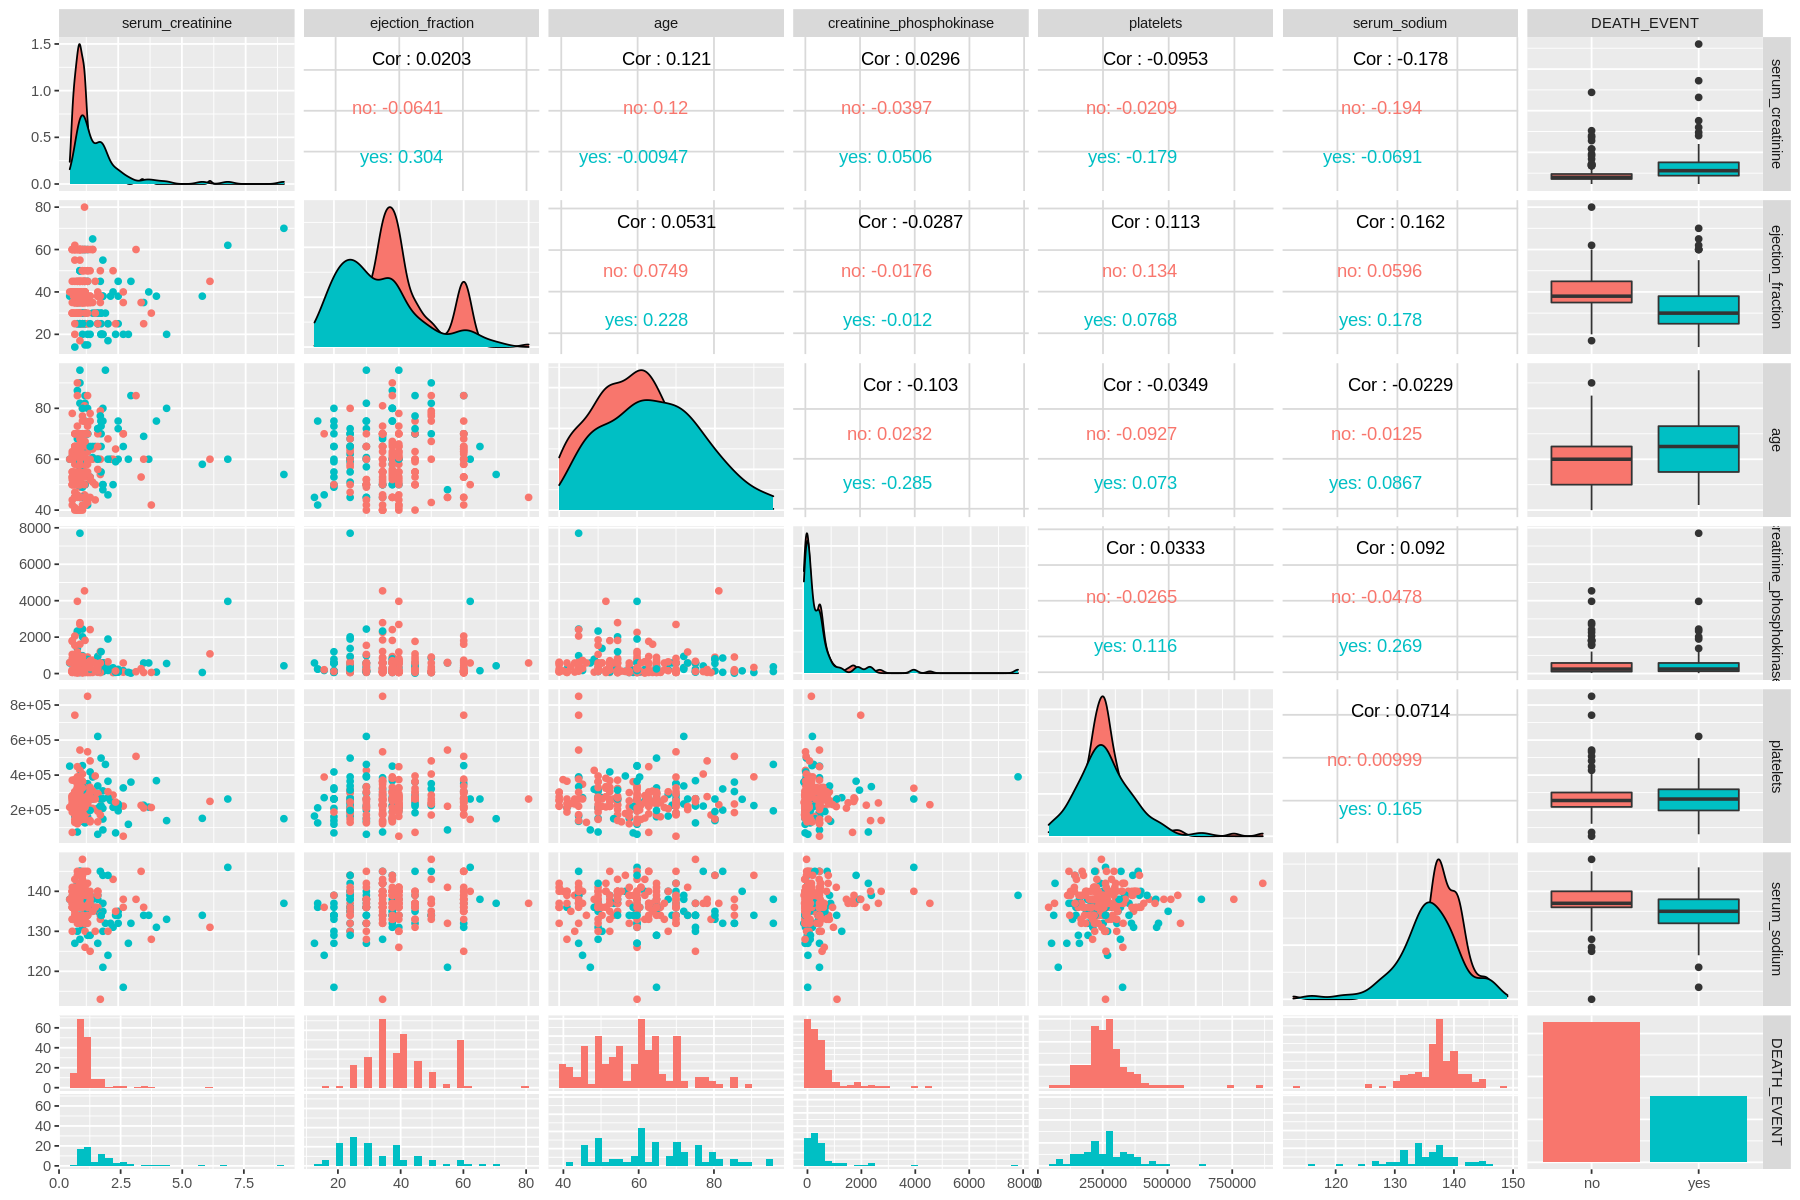

In [7]:
# To observe which variables could be the most useful predictors from this data set we use ggpairs to build a scatter plot matrix
# of all numeric variables in our data set. To do this we are using the GGally and ggplot2 packages. In this matrix, each pair of
# numeric pairs are drawn with scatter plots and for the DEATH_EVENT column they are drawn with bar plots. Variable distribution 
# is displayed diagonally. The Pearson correlation is displayed on the right of the matrix. 

options(repr.plot.width = 15, repr.plot.height = 10)

heart_failure_select <- heart_failure_train %>% 
                        select(serum_creatinine, ejection_fraction, age, creatinine_phosphokinase, platelets,
                               serum_sodium, DEATH_EVENT)

ggpairs(heart_failure_select, ggplot2::aes(colour=DEATH_EVENT))


# Prior domain experts also indicated in their research that serum creatinine and ejection fraction are the most relevant
# medical features. 

In [8]:
# We will now extract the columns that will be most important for our analysis and provide us the most accuracy in our prediction. 
# Our predictors are ejection_fraction, serum_creatinine, and time. The outcome is DEATH EVENT.

heart_failure <- select(heart_failure, ejection_fraction, serum_creatinine, DEATH_EVENT)
heart_failure

ejection_fraction,serum_creatinine,DEATH_EVENT
<dbl>,<dbl>,<fct>
20,1.9,yes
38,1.1,yes
20,1.3,yes
⋮,⋮,⋮
60,0.8,no
38,1.4,no
45,1.6,no


In [9]:
set.seed(20)

# Below is a table of the means of our predictor variables:

means_data <- heart_failure_train %>%
              group_by(DEATH_EVENT) %>%
              summarize(ejection_fraction_average = mean(ejection_fraction),
                       serum_creatinine_average = mean(serum_creatinine))

means_data

`summarise()` ungrouping output (override with `.groups` argument)



DEATH_EVENT,ejection_fraction_average,serum_creatinine_average
<fct>,<dbl>,<dbl>
no,40.87730,1.189387
yes,33.19481,1.849091


In [10]:
# The number of missing rows in the training data set using the sum() and is.na() function.

sum(is.na(heart_failure_train))

# The value shows the number of missing rows (NA values). In this case since the sum is 0, that means there are no missing values

[1] 0

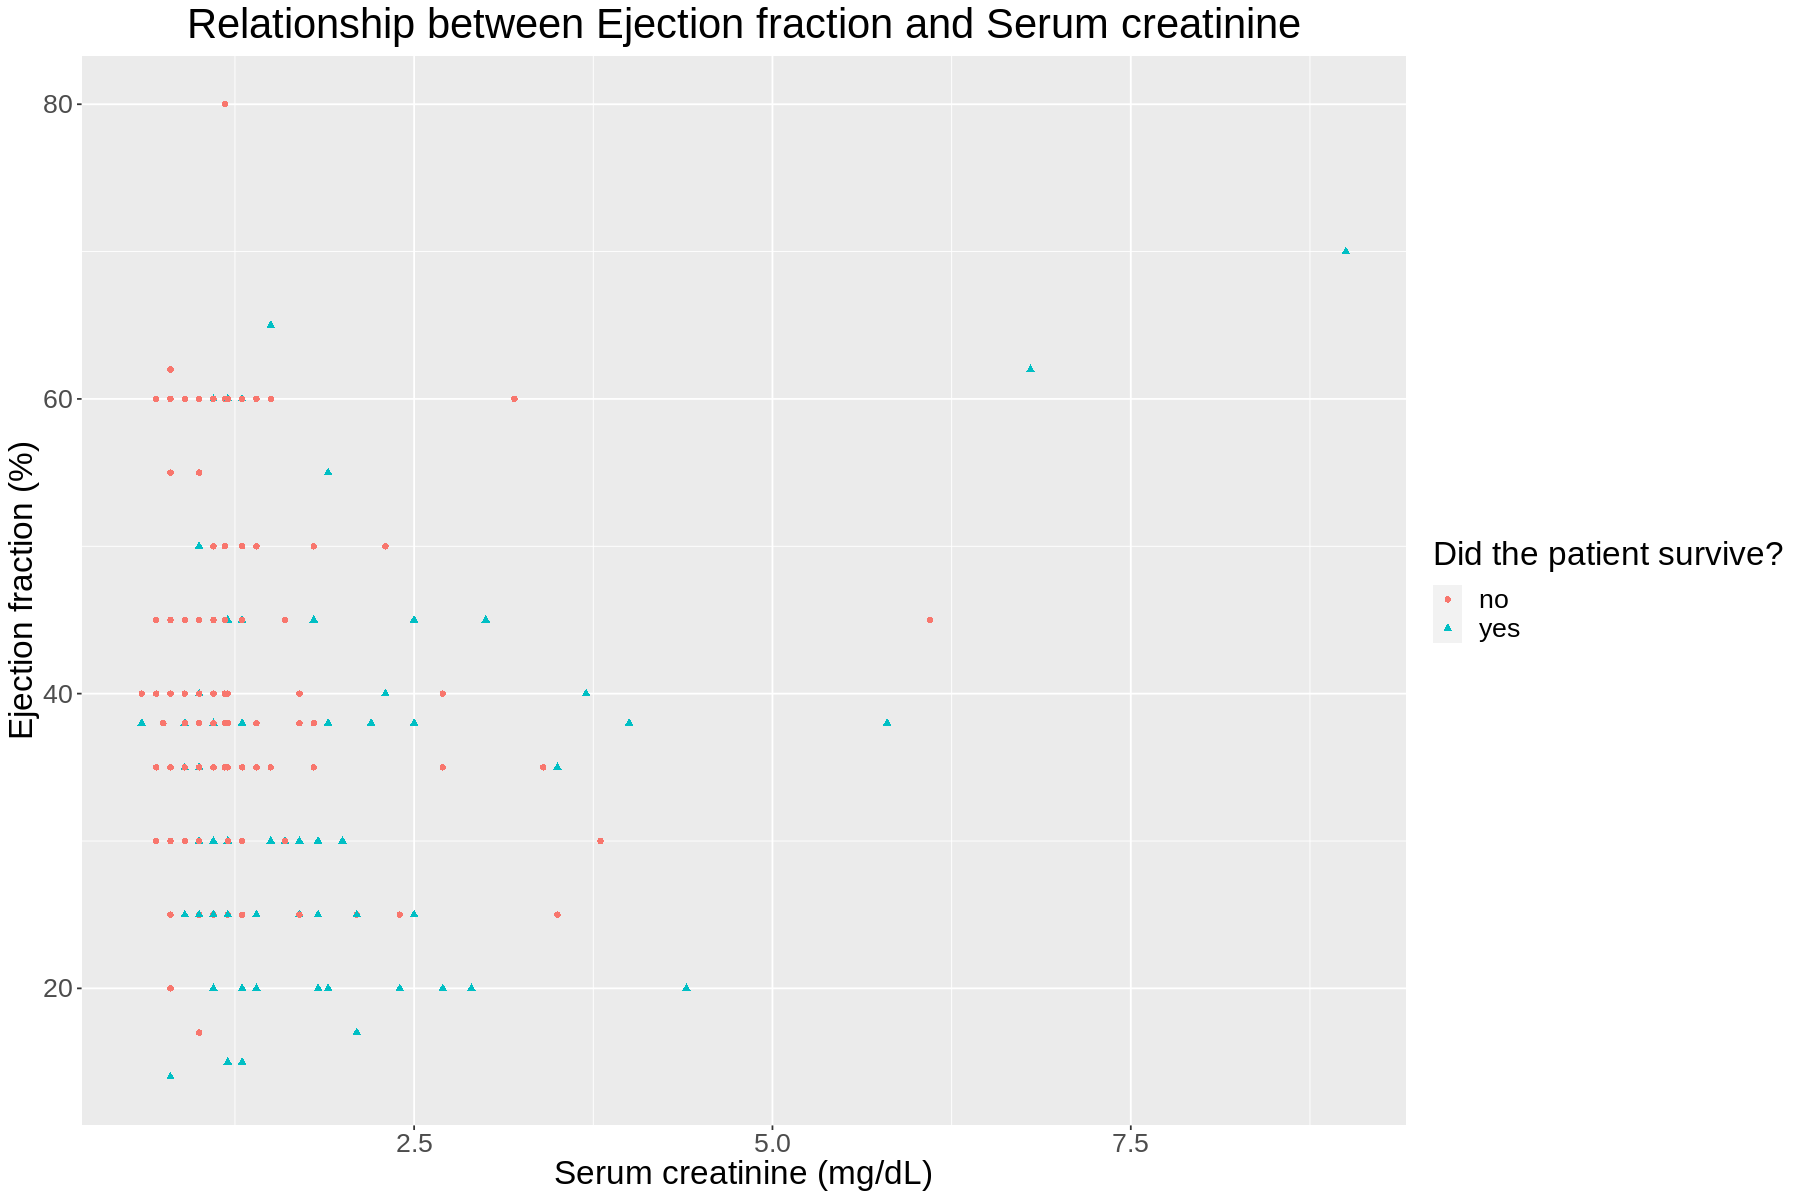

In [11]:
set.seed(20)

options(repr.plot.width = 15, repr.plot.height = 10)

ef_vs_sc_plot <- heart_failure_train %>%
                ggplot(aes(x = serum_creatinine, y = ejection_fraction, colour = DEATH_EVENT, shape =  DEATH_EVENT))+
                geom_point() +
                labs(x = "Serum creatinine (mg/dL)", y = "Ejection fraction (%)", colour = "Did the patient survive?",
                    shape = "Did the patient survive?") +
                theme(text = element_text(size = 20)) +
                ggtitle("Relationship between Ejection fraction and Serum creatinine") +
                theme(plot.title = element_text(hjust = 0.5, size = 25))

ef_vs_sc_plot


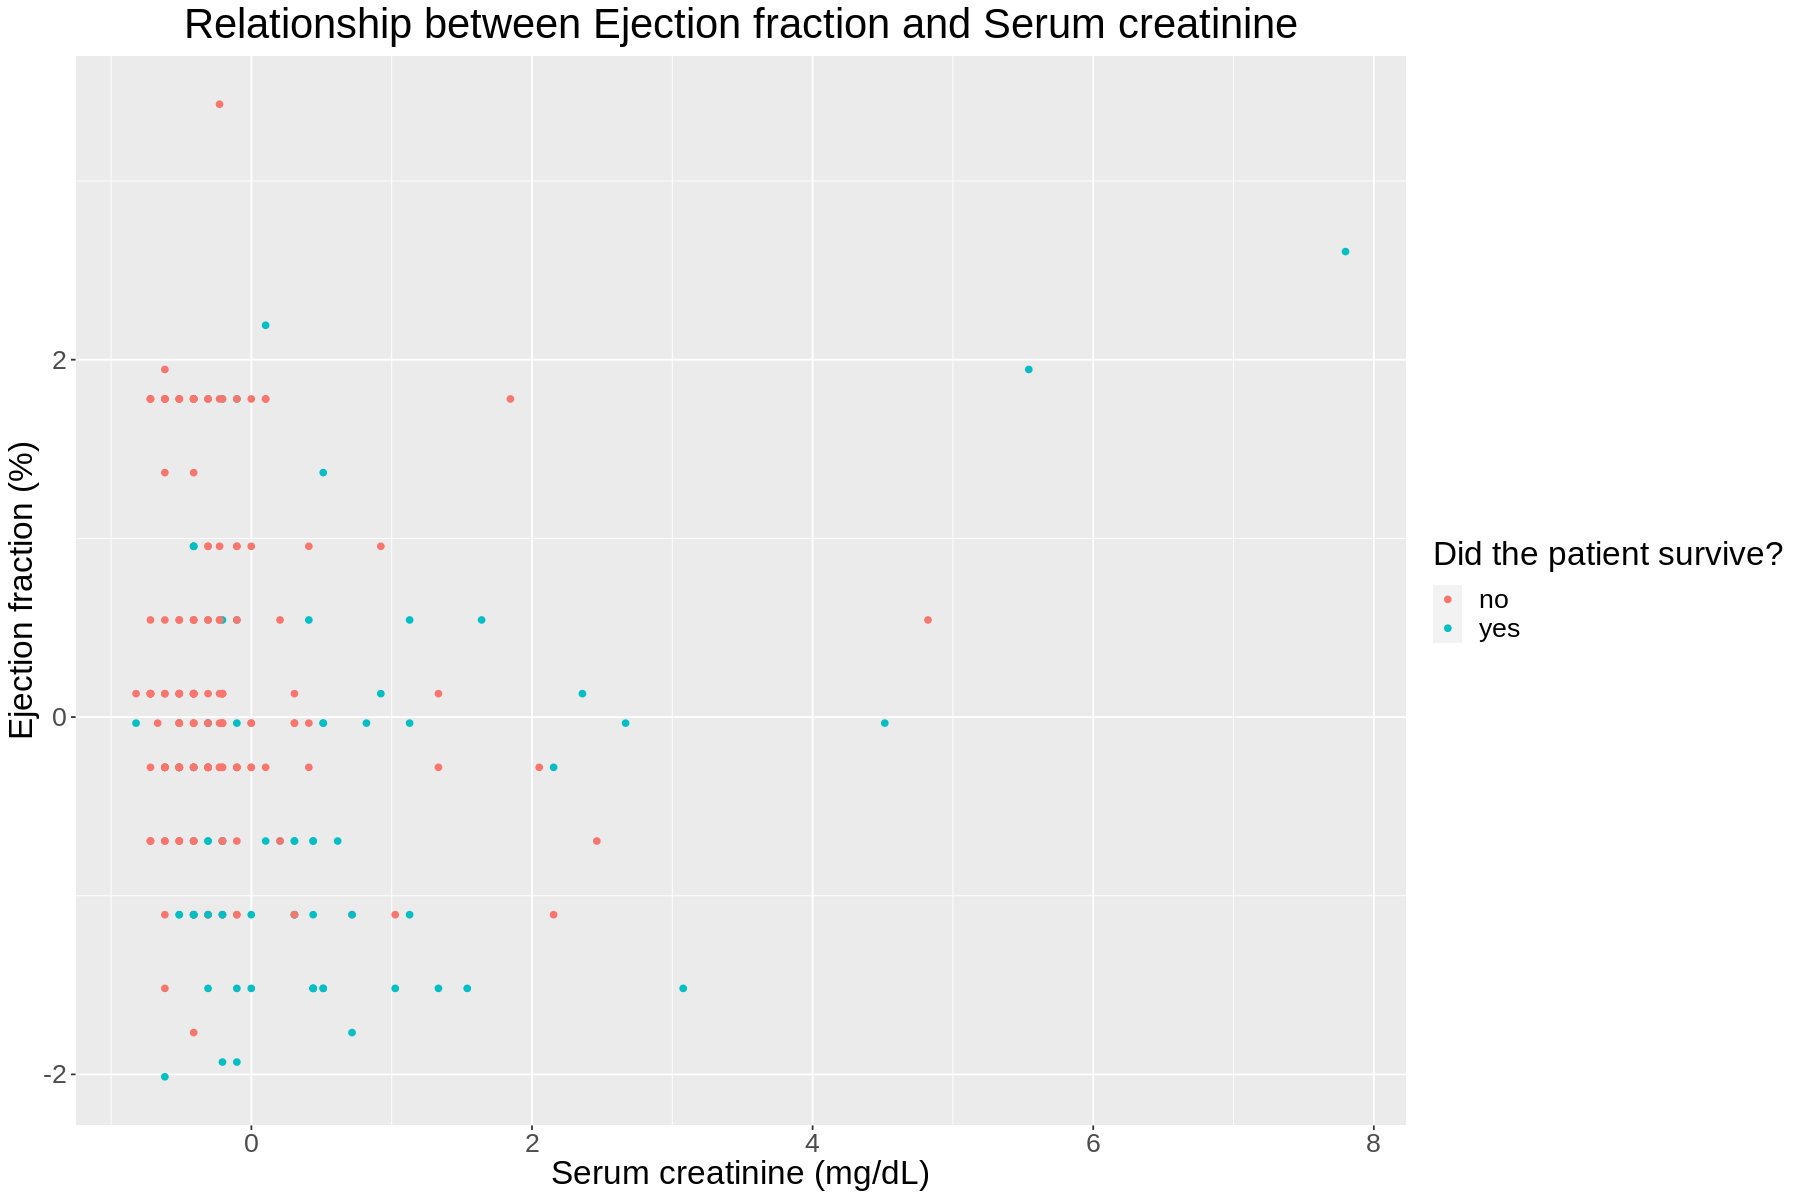

In [12]:
# A scaled plot of the predictor variables. 

heart_failure_recipe <- recipe(DEATH_EVENT ~ serum_creatinine + ejection_fraction, data = heart_failure_train) %>%
                        step_scale(all_predictors()) %>%
                        step_center(all_predictors()) %>%
                        prep()




scaled_heart_failure <- bake(heart_failure_recipe, heart_failure_train)
cross_val_plot <- ggplot(scaled_heart_failure, aes(x =serum_creatinine, y = ejection_fraction, color = DEATH_EVENT)) +
                    geom_point() +
                    labs(x = "Serum creatinine (mg/dL)", y = "Ejection fraction (%)", colour = "Did the patient survive?",
                    shape = "Did the patient survive?") +
                    theme(text = element_text(size = 20)) +
                    ggtitle("Relationship between Ejection fraction and Serum creatinine") +
                    theme(plot.title = element_text(hjust = 0.5, size = 25))
cross_val_plot


In [13]:
# Here I have converted the time column from days to months. For total days less than 30 the month is 0. 
# The months are calculated by total days divided by 30 days. 

set.seed(20)

heart_failure_train <- heart_failure_train %>%
                        mutate(month_time = as.integer(time/30)) %>%
                        group_by(month_time, DEATH_EVENT) %>%
                        summarize(n = n())


heart_failure_train


`summarise()` regrouping output by 'month_time' (override with `.groups` argument)



month_time,DEATH_EVENT,n
<int>,<fct>,<int>
0,no,3
0,yes,25
1,no,2
⋮,⋮,⋮
8,no,20
8,yes,1
9,no,6


## Methods:
In the ggpairs plot, we create scatterplots with all numeric variables in the data set. Out of all the scatter plots displayed, the clearest separation between red points (no deaths) and blue points (deaths) is with serum_creatinine and ejection_fraction scatter plot. It also has a Pearson correlation value farthest from 1, when comparing all values. Therefore, one variable is not dependent on the other and we can obtain new information by using them as predictors. We visualize our results by creating a scaled scatter plot with our two predictor values. The strength of the scatter plot is weak, with slight linearity, and a positive direction. 

|Chosen predictors|Medical reasoning|
|-----------------|-----------------|
|Ejection Fraction (EF)|Low EF could cause sudden cardiac arrest and eventually death| 
|Serum creatinine (sCr)|High (sCr) indicate renal dysfunction (kidney failure) and eventually cause death|

The target column is the DEATH_EVENT column. 

## Expected outcomes and significance:

The outcome from this project is that we will be able to accurately predict the chances of a patient surviving based on serum_creatinine and ejection_fraction. The major impact from such findings would be that doctors can identify which patient needs immediate treatment from just ejection fraction and serum creatinine levels even if the patient is missing other clinical tests on their medical records.

Future questions: 
   - Are there some variables not included in this data set that could impact our prediction?
   - What is the partial impact fraction that could affect our results?
   - What additional information may the doctor need if the predicted outcome is death?
